In [1]:
from numba import jit, njit, vectorize, float64
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm 

In [2]:
# S_space = np.arange(50)
# XI_space = np.arange(20)
# A_space = np.arange(50)
# Z_space = np.arange(500)
# W_space = np.arange(100)

w_bias = -50
S_space = np.arange(50)
XI_space = np.arange(20)
A_space = np.arange(50)
Z_space = np.arange(500)
W_space = np.arange(100)+w_bias

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [3]:
prob = np.ones(len(XI_space))*1/len(XI_space)

In [4]:
p, c = 10, 5

In [5]:
@jit(nopython=True)
def R_t(S_space, A_space, Xi_space): # Function is compiled and runs in machine code
    res = np.zeros(shape=(len(S_space), len(A_space), len(Xi_space)))
    for s in S_space:
        for a in A_space:
            for xi in Xi_space:
                res[s,a,xi] = p*min(s+a,xi) - c*a
    return res 

# RN

In [6]:
@jit(nopython=True)
def solver_t(r, v, prob, S_space, A_space, Xi_space):
    r_sa = np.zeros(shape=(len(S_space), len(A_space)))
    for s in S_space:
        for a in A_space:
            s_next = np.clip(s+a-Xi_space, a_min=min(S_space), a_max=max(S_space))

            v_next = np.array([ v[int(ss)] for ss in s_next ])
            r_sa[s,a] = np.dot(r[s,a] + v_next, prob)   
    
    opt_a = [ rs.argmax() for rs in r_sa ]
    opt_r = [ rs.max() for rs in r_sa ]
    return opt_a, opt_r

In [7]:
start = time.time()
r_T=R_t(np.arange(10), np.arange(10), np.arange(10))
print(f'run time: {time.time()-start}')

start = time.time()
r_t=R_t(np.arange(10), np.arange(10), np.arange(10))
print(f'run time: {time.time()-start}')

v_TT = np.zeros(10)
a_T, v_T = solver_t(r_T, v_TT, np.ones(10)*0.1, np.arange(10), np.arange(10), np.arange(10))
a_t, v_t = solver_t(r_t, v_T, np.ones(10)*0.1, np.arange(10), np.arange(10), np.arange(10))
a_t

run time: 0.22870087623596191
run time: 5.0067901611328125e-05


/Users/momodupi/miniconda3/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'v' of function 'solver_t'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../var/folders/c8/bhktjw_92pbd_b3n7f7j29xh0000gn/T/ipykernel_3510/3877113578.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


[8, 7, 6, 5, 4, 3, 2, 1, 0, 0]

In [8]:
w_bias = -50
S_space = np.arange(50)
XI_space = np.arange(20)
A_space = np.arange(50)
Z_space = np.arange(500)
W_space = np.arange(100)+w_bias

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [9]:
T = 20

value_functions_RN = {T: np.zeros(len(S_space))}
optimal_actions_RN = {}

In [10]:
r_t = R_t(S_space, A_space, XI_space)
for t in range(T-1, -1, -1):
    optimal_actions_RN[t], value_functions_RN[t] = solver_t(r_t, value_functions_RN[t+1], prob, S_space, A_space, XI_space)

In [11]:
# optimal_actions
action_matrix = np.array([ optimal_actions_RN[t] for t in optimal_actions_RN ])
action_df = pd.DataFrame(action_matrix)
action_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,9,8,7,6,5,4,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,17,16,15,14,13,12,11,10,9,8,...,0,0,0,0,0,0,0,0,0,0
2,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
3,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
4,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
5,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
6,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
7,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
8,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0
9,19,18,17,16,15,14,13,12,11,10,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'RN optimal actions for each state in $\\mathbb{S}$')

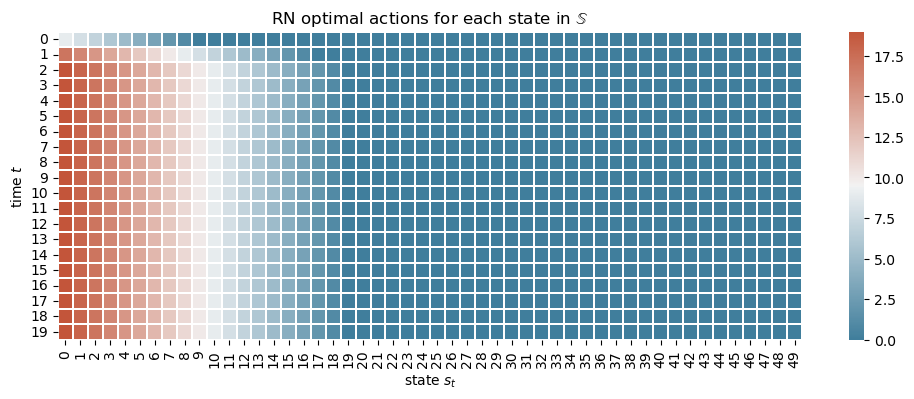

In [12]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(action_df, cmap=cmap, linewidths=.1, ax=ax)
ax.set_xlabel(r'state $s_t$')
ax.set_ylabel(r'time $t$')
ax.set_title(r'RN optimal actions for each state in $\mathbb{S}$')

Text(0.5, 1.0, 'RN value functions for each state in $\\mathbb{S}$')

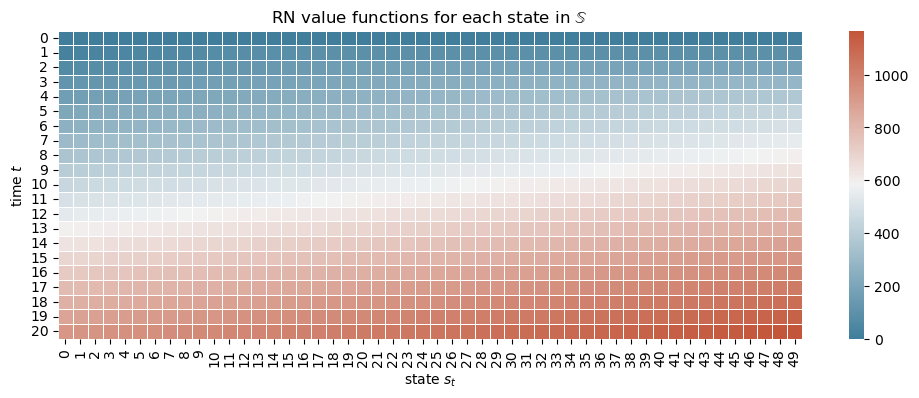

In [13]:
value_matrix = np.array([ value_functions_RN[t] for t in value_functions_RN ])
value_df = pd.DataFrame(value_matrix)

fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(value_df, cmap=cmap, linewidths=.5, ax=ax)
ax.set_xlabel(r'state $s_t$')
ax.set_ylabel(r'time $t$')
ax.set_title(r'RN value functions for each state in $\mathbb{S}$')

# CVaR

In [14]:
@jit(nopython=True)
def CVAR(x, p, alpha):
    ita_array = np.arange(2000)
    ita_x = np.zeros(shape=(len(ita_array), len(x)))
    for ita_idx, ita in enumerate(range(len(ita_array))):
        ita_x[ita_idx, :] = np.clip(ita-x, a_min=0, a_max=np.inf)

    return np.max(ita_array - ita_x.dot(p)/alpha)

In [15]:
x_test = np.arange(10)
p_test = np.ones(10)/10

CVAR(x_test, p_test, 0.6)

2.5

In [16]:
VAR_alpha = 0.6

@jit(nopython=True)
def solver_cvar_t(r, v, prob, S_space, A_space, XI_space):
    r_sa = np.zeros(shape=(len(S_space), len(A_space)))
    for s in S_space:
        for a in A_space:
            # for xi in Xi_space:
            s_next = np.clip(s+a-XI_space, a_min=0, a_max=max(S_space))
            v_next = np.array([ v[int(ss)] for ss in s_next ])

            r_sa[s,a] = CVAR(r[s,a] + v_next, prob, VAR_alpha)            
    
    opt_a = [ rs.argmax() for rs in r_sa ]
    opt_r = [ rs.max() for rs in r_sa ]
    return opt_a, opt_r

In [17]:
start = time.time()
r_T=R_t(np.arange(10), np.arange(10), np.arange(10))
print(f'run time: {time.time()-start}')

start = time.time()
r_t=R_t(np.arange(10), np.arange(10), np.arange(10))
print(f'run time: {time.time()-start}')

v_TT = np.zeros(10)
a_T, v_T = solver_cvar_t(r_T, v_TT, np.ones(10)*0.1, np.arange(10), np.arange(10), np.arange(10))
a_t, v_t = solver_cvar_t(r_t, v_T, np.ones(10)*0.1, np.arange(10), np.arange(10), np.arange(10))
v_t

run time: 0.0003180503845214844
run time: 0.00013303756713867188


/Users/momodupi/miniconda3/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'v' of function 'solver_cvar_t'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../var/folders/c8/bhktjw_92pbd_b3n7f7j29xh0000gn/T/ipykernel_3510/3565387876.py", line 3:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


[16.388888888888886,
 21.388888888888886,
 26.388888888888886,
 31.388888888888886,
 36.388888888888886,
 41.388888888888886,
 44.72222222222222,
 47.22222222222222,
 48.888888888888886,
 49.72222222222222]

In [18]:
T = 20

value_functions_cvar = {T: np.zeros(len(S_space))}
optimal_actions_cvar = {}

In [19]:
r_t = R_t(S_space, A_space, XI_space)
for t in tqdm(range(T-1, -1, -1)):    
    optimal_actions_cvar[t], value_functions_cvar[t] = solver_cvar_t(r_t, value_functions_cvar[t+1], prob, S_space, A_space, XI_space)

100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


In [20]:
# optimal_actions
action_matrix = np.array([ optimal_actions_cvar[t] for t in optimal_actions_cvar ])
action_df = pd.DataFrame(action_matrix)
action_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,5,4,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,9,8,7,6,5,4,3,2,1,...,0,0,0,0,0,0,0,0,0,0
2,11,10,9,8,7,6,5,4,3,2,...,0,0,0,0,0,0,0,0,0,0
3,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0
4,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0
5,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0
6,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0
7,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0
8,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0
9,12,11,10,9,8,7,6,5,4,3,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'CVaR@0.6: optimal actions for each state in $\\mathbb{S}$')

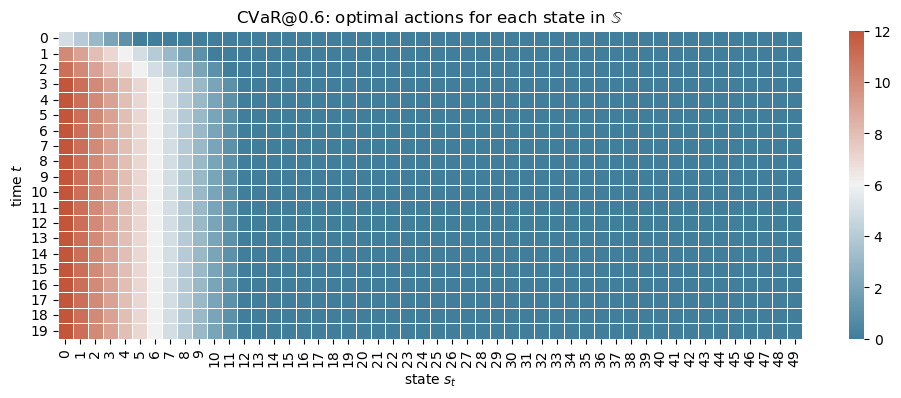

In [21]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(action_df, cmap=cmap, linewidths=.5, ax=ax)
ax.set_xlabel(r'state $s_t$')
ax.set_ylabel(r'time $t$')
ax.set_title(f'CVaR@{VAR_alpha}: optimal actions for each state in '+r'$\mathbb{S}$')

In [22]:
# optimal_actions
value_matrix = np.array([ value_functions_cvar[t] for t in value_functions_cvar ])
value_df = pd.DataFrame(value_matrix)
value_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12.500000,17.500000,22.500000,27.500000,32.500000,37.500000,42.500000,46.666667,50.000000,52.500000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
2,38.111111,43.111111,48.111111,53.111111,58.111111,63.111111,68.111111,73.111111,78.111111,83.111111,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
3,65.553241,70.553241,75.553241,80.553241,85.553241,90.553241,95.553241,100.553241,105.553241,110.553241,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
4,93.040123,98.040123,103.040123,108.040123,113.040123,118.040123,123.040123,128.040123,133.040123,138.040123,...,219.972994,219.989873,219.997106,219.999518,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
5,120.540123,125.540123,130.540123,135.540123,140.540123,145.540123,150.540123,155.540123,160.540123,165.540123,...,273.556255,273.974730,274.289545,274.520841,274.686592,274.802236,274.880441,274.931319,274.962907,274.981433
6,148.040123,153.040123,158.040123,163.040123,168.040123,173.040123,178.040123,183.040123,188.040123,193.040123,...,321.963944,323.459158,324.741153,325.826296,326.732591,327.479020,328.084839,328.568937,328.949412,329.243209
7,175.540123,180.540123,185.540123,190.540123,195.540123,200.540123,205.540123,210.540123,215.540123,220.540123,...,363.012612,365.824478,368.405536,370.754970,372.874940,374.770501,376.449408,377.921814,379.199906,380.297506
8,203.040123,208.040123,213.040123,218.040123,223.040123,228.040123,233.040123,238.040123,243.040123,248.040123,...,397.750846,401.609377,405.295687,408.798117,412.106477,415.212344,418.109316,420.793200,423.262134,425.516636
9,230.540123,235.540123,240.540123,245.540123,250.540123,255.540123,260.540123,265.540123,270.540123,275.540123,...,428.543456,433.030903,437.418343,441.693491,445.843925,449.857331,453.721765,457.425924,460.959415,464.313010


Text(0.5, 1.0, 'CVaR@0.6: value functions for each state in $\\mathbb{S}$')

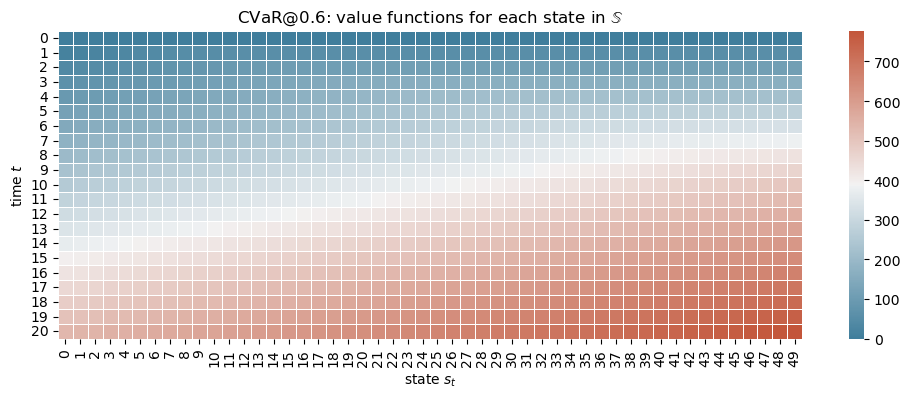

In [23]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(value_df, cmap=cmap, linewidths=.5, ax=ax)
ax.set_xlabel(r'state $s_t$')
ax.set_ylabel(r'time $t$')
ax.set_title(f'CVaR@{VAR_alpha}: value functions for each state in '+r'$\mathbb{S}$')

# rollout

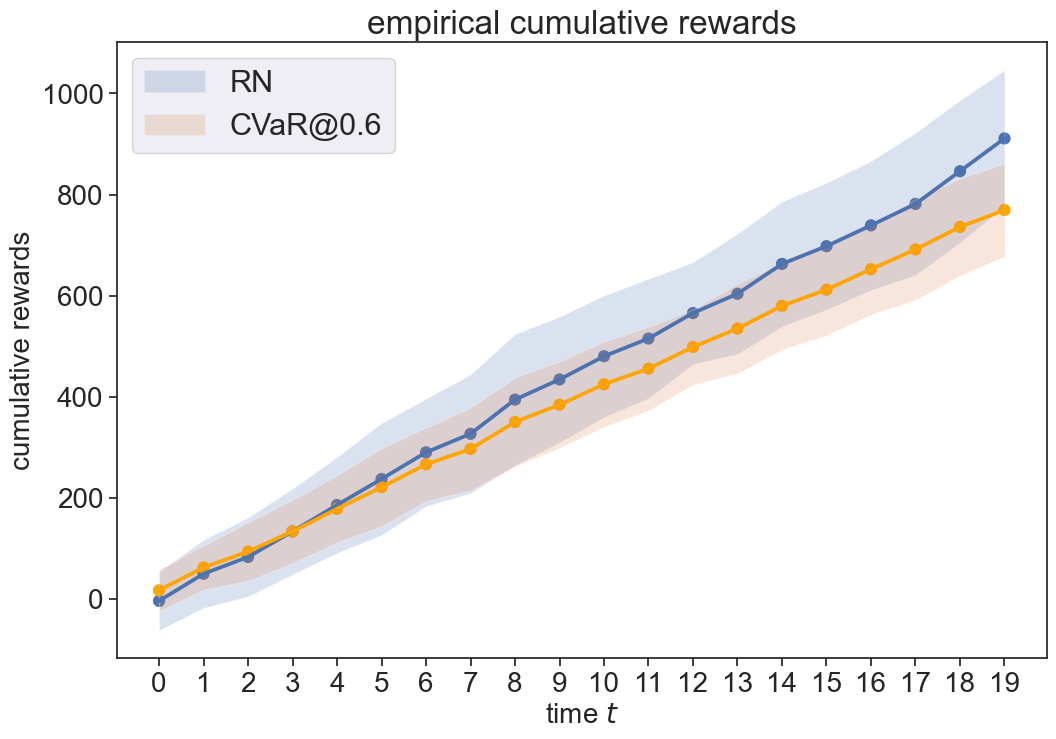

In [24]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
sns.set(font_scale=2)

CNT = 50
# generate random samples
np.random.seed(0)
s_history = np.zeros(shape=(CNT,T))
a_history = np.zeros(shape=(CNT,T))
r_history = np.zeros(shape=(CNT,T))

for cnt in range(CNT):
    xi_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_history[cnt, t]
        a_t = optimal_actions_RN[t][int(s_t)]
        r_history[cnt, t] = r_t[int(s_t), a_t, xi_history[t]]
        s_next = np.clip(s_t+a_t-xi_history[t], a_min=min(S_space), a_max=max(S_space))
        
        if t+1 <= T-1:
            s_history[cnt, t+1] = s_next
            
r_history_cumsum = r_history.cumsum(axis=1)
r_history_mean = r_history_cumsum.mean(axis=0)
r_history_std = r_history_cumsum.std(axis=0)

# rn_history_df = pd.DataFrame(data=r_history_cumsum.T)
# rn_history_df

sns.pointplot(x=np.arange(T), y=r_history_mean, ax=ax, color='b')
ax.fill_between(x=np.arange(T), y1=r_history_mean-r_history_std, y2=r_history_mean+r_history_std, 
                alpha=0.2, label='RN')


np.random.seed(0)
s_history = np.zeros(shape=(CNT,T))
a_history = np.zeros(shape=(CNT,T))
r_history = np.zeros(shape=(CNT,T))
for cnt in range(CNT):
    xi_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_history[cnt, t]
        a_t = optimal_actions_cvar[t][int(s_t)]
        r_history[cnt, t] = r_t[int(s_t), a_t, xi_history[t]]
        s_next = np.clip(s_t+a_t-xi_history[t], a_min=0, a_max=max(S_space))
        
        if t+1 <= T-1:
            s_history[cnt, t+1] = s_next
            
r_history_cumsum = r_history.cumsum(axis=1)
r_history_mean = r_history_cumsum.mean(axis=0)
r_history_std = r_history_cumsum.std(axis=0)

sns.pointplot(x=np.arange(T), y=r_history_mean, ax=ax, color='orange')
ax.fill_between(x=np.arange(T), y1=r_history_mean-r_history_std, y2=r_history_mean+r_history_std, 
                alpha=0.2, label=f'CVaR@{VAR_alpha}')

ax.set_title('empirical cumulative rewards')
ax.legend()
ax.set_xlabel(r'time $t$', fontsize=20)
ax.set_ylabel('cumulative rewards', fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# ax.set_yticks(fontsize=20)


## Standard capital requirement

In [25]:
S_space = np.arange(10)
XI_space = np.arange(10)
A_space = np.arange(10)
Z_space = np.arange(100)
W_space = np.arange(10)

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [26]:
# w_{t+1} = w_t - z_t
# A = E[R(s_t,a_t)] + z_t > zeta

@jit(nopython=True)
def solver_scr_wT(r, prob, S_space, A_space, Z_space, W_space, Xi_space):
    w_bias = min(W_space)
    SW_space = np.arange(len(S_space)*len(W_space))
    AZ_space = np.arange(len(A_space)*len(Z_space))   
    
    r_sa = np.zeros(shape=(len(SW_space), len(AZ_space)))
    for sw in SW_space:
        for az in AZ_space:

            s, w = sw//len(W_space), sw%len(W_space)+w_bias
            z, a = az//len(A_space), az%len(A_space)
            
            exp_z = np.dot(r[s,a], prob)

            if exp_z-z >= zeta and w+exp_z-z >= 0:
                r_sa[sw,az] = 0
            else:
                r_sa[sw,az] = np.inf
                
    opt_a = [ rs.argmin() for rs in r_sa ]
    opt_r = [ rs.min() for rs in r_sa ]
    return opt_a, opt_r


@jit(nopython=True)
def solver_scr_wt(r, v, prob, S_space, A_space, Z_space, W_space, Xi_space):
    w_bias = min(W_space)
    SW_space = np.arange(len(S_space)*len(W_space))
    AZ_space = np.arange(len(A_space)*len(Z_space))   
    
    r_sa = np.zeros(shape=(len(SW_space), len(AZ_space)))
    for sw in SW_space:
        for az in AZ_space:
            s, w = sw//len(W_space), sw%len(W_space)+w_bias
            z, a = az//len(A_space), az%len(A_space)
            
            exp_z = np.dot(r[s,a], prob)

            if exp_z+z >= zeta:
                w_next = min(max(w-z, w_bias), max(W_space))
                s_next = np.clip(s+a-Xi_space, a_min=min(S_space), a_max=max(S_space))

                sw_next = s_next*len(W_space)+(w_next-w_bias)
                v_next = np.array([ v[int(ssww)] for ssww in sw_next ])

                r_sa[sw,az] = np.dot(v_next, prob)
            else:
                r_sa[sw,az] = np.inf
                
    opt_a = [ rs.argmin() for rs in r_sa ]
    opt_r = [ rs.min() for rs in r_sa ]
    return opt_a, opt_r


@jit(nopython=True)
def solver_scr_w0(r, v, prob, S_space, A_space, Z_space, W_space, Xi_space):
    w_bias = min(W_space)
    AZW_space = np.arange(len(A_space)*len(Z_space)*len(W_space))   
    
    r_sa = np.zeros(shape=(len(S_space), len(AZW_space)))
    for s in S_space:
        for azw in AZW_space:
            w, az = azw//(len(A_space)*len(Z_space))+w_bias, azw%(len(A_space)*len(Z_space))
            z, a = az//len(A_space), az%len(A_space)
            
            exp_z = np.dot(r[s,a], prob)

            if exp_z+z >= zeta:
                w_next = min(max(w-z, w_bias), max(W_space))
                s_next = np.clip(s+a-Xi_space, a_min=min(S_space), a_max=max(S_space))
                sw_next = s_next*len(W_space)+(w_next-w_bias)
                v_next = np.array([ v[int(ssww)] for ssww in sw_next ])

                r_sa[s,azw] = np.dot(v_next, prob)
            else:
                r_sa[s,azw] = np.inf
                
    opt_a = [ rs.argmin() for rs in r_sa ]
    opt_r = [ rs.min() for rs in r_sa ]
    return opt_a, opt_r

In [27]:
start = time.time()
r_t=R_t(S_space, A_space, XI_space)
print(f'run time: {time.time()-start}')

a_T, v_T = solver_scr_wT(r_t, prob, S_space, A_space, Z_space, W_space, XI_space)
a_t, v_t = solver_scr_wt(r_t, v_T, prob, S_space, A_space, Z_space, W_space, XI_space)

a_0, v_0 = solver_scr_w0(r_t, v_T, prob, S_space, A_space, Z_space, W_space, XI_space)

a_0

run time: 5.412101745605469e-05


/Users/momodupi/miniconda3/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'v' of function 'solver_scr_wt'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../var/folders/c8/bhktjw_92pbd_b3n7f7j29xh0000gn/T/ipykernel_3510/391684770.py", line 29:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/Users/momodupi/miniconda3/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'v' of function 'solver_scr_w0'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-se

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
w_bias = -50
S_space = np.arange(50)
XI_space = np.arange(20)
A_space = np.arange(50)
Z_space = np.arange(500)
W_space = np.arange(100)+w_bias

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [29]:
T = 20

value_functions_scr = {}
optimal_actions_scr = {}

In [30]:
r_t = R_t(S_space, A_space, XI_space)

optimal_actions_scr[T], value_functions_scr[T] = solver_scr_wT(r_t, prob, S_space, A_space, Z_space, W_space, XI_space)

for t in tqdm(range(T-1, 0, -1)):    
    optimal_actions_scr[t], value_functions_scr[t] = solver_scr_wt(r_t, value_functions_scr[t+1], prob, S_space, A_space, Z_space, W_space, XI_space)
    
   
optimal_actions_scr[0], value_functions_scr[0] = solver_scr_w0(r_t, value_functions_scr[1], prob, S_space, A_space, Z_space, W_space, XI_space)

100%|██████████| 19/19 [09:50<00:00, 31.06s/it]


## Wealth reserve

In [32]:
S_space = np.arange(10)
XI_space = np.arange(10)
A_space = np.arange(10)
Z_space = np.arange(100)
W_space = np.arange(10)

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [33]:
# w_{t+1} = w_t + z_t
# A = w_t + E[R_t(s_t,a_t)] + z_t >= zeta

@jit(nopython=True)
def solver_wr_wt(r, v, prob, S_space, A_space, Z_space, W_space, Xi_space):
    SW_space = np.arange(len(S_space)*len(W_space))
    AZ_space = np.arange(len(A_space)*len(Z_space))   
    
    r_sa = np.zeros(shape=(len(SW_space), len(AZ_space)))
    for sw in SW_space:
        for az in AZ_space:
            s, w = sw//len(W_space), sw%len(W_space)+w_bias
            z, a = az//len(A_space), az%len(A_space)
            
            exp_z = np.dot(r[s,a], prob)

            if w+exp_z+z >= zeta:
                w_next = np.clip(w+r[s,a], a_min=min(W_space), a_max=max(W_space))
                s_next = np.clip(s+a-Xi_space, a_min=min(S_space), a_max=max(S_space))

                sw_next = s_next*len(W_space)+(w_next-w_bias)
                v_next = np.array([ v[int(ssww)] for ssww in sw_next ])

                r_sa[sw,az] = z+np.dot(v_next, prob)
            else:
                r_sa[sw,az] = np.inf
                
    opt_a = [ rs.argmin() for rs in r_sa ]
    opt_r = [ rs.min() for rs in r_sa ]
    return opt_a, opt_r

In [34]:
start = time.time()
r_t=R_t(S_space, A_space, XI_space)
print(f'run time: {time.time()-start}')

v_T = np.zeros(len(S_space)*len(W_space))
a_t, v_t = solver_wr_wt(r_t, v_T, prob, S_space, A_space, Z_space, W_space, XI_space)  

run time: 9.179115295410156e-05


In [35]:
w_bias = -50
S_space = np.arange(50)
XI_space = np.arange(20)
A_space = np.arange(50)
Z_space = np.arange(500)
W_space = np.arange(100)+w_bias

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [36]:
T = 20
r_t=R_t(S_space, A_space, XI_space)
value_functions_wr = {T: np.zeros(len(S_space)*len(W_space))}
optimal_actions_wr = {}

In [37]:
for t in tqdm(range(T-1, -1, -1)):    
    optimal_actions_wr[t], value_functions_wr[t] = solver_wr_wt(r_t, value_functions_wr[t+1], prob, S_space, A_space, Z_space, W_space, XI_space)

  5%|▌         | 1/20 [00:45<14:20, 45.27s/it]/Users/momodupi/miniconda3/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'v' of function 'solver_wr_wt'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../var/folders/c8/bhktjw_92pbd_b3n7f7j29xh0000gn/T/ipykernel_3510/4026297799.py", line 4:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
100%|██████████| 20/20 [15:05<00:00, 45.28s/it]


Text(0.5, 1.0, 'optimal actions for each state in $\\mathbb{S}$')

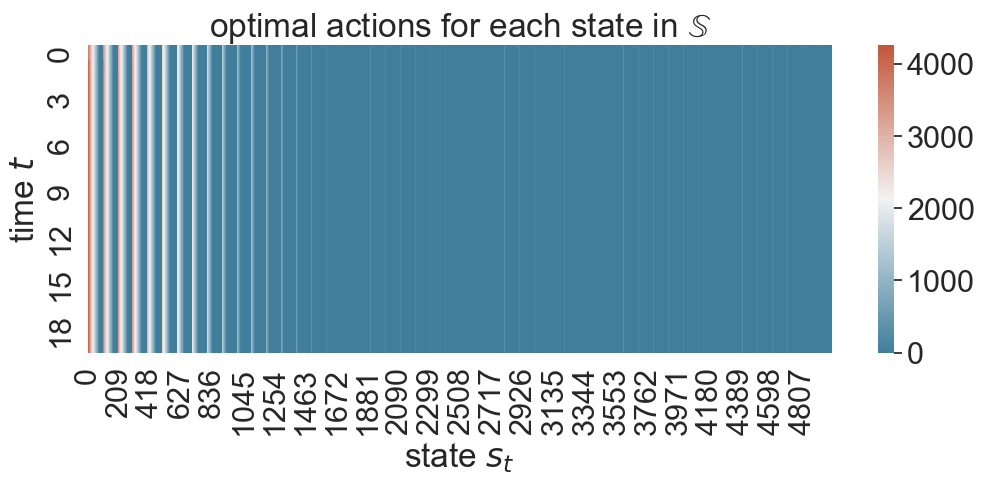

In [38]:
action_matrix = np.array([ optimal_actions_wr[t] for t in optimal_actions_wr ])
action_df = pd.DataFrame(action_matrix)

fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(action_df, cmap=cmap, ax=ax)
ax.set_xlabel(r'state $s_t$')
ax.set_ylabel(r'time $t$')
ax.set_title(f'optimal actions for each state in '+r'$\mathbb{S}$')

## Cash Order Only

In [39]:
S_space = np.arange(10)
XI_space = np.arange(10)
A_space = np.arange(10)
Z_space = np.arange(100)
W_space = np.arange(10)

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [40]:
# w_{t+1} = w_t + r_t
# A = c*a_t <= w_t + zeta


@jit(nopython=True)
def solver_co_wt(r, v, prob, S_space, A_space, W_space, Xi_space):
    w_bias = min(W_space)
    SW_space = np.arange(len(S_space)*len(W_space))
    
    r_sa = np.zeros(shape=(len(SW_space), len(A_space)))
    for sw in SW_space:
        for a in A_space:
            s, w = sw//len(W_space), sw%len(W_space)+w_bias
            
            if c*a <= w + zeta:
                w_next = np.clip(w+r[s,a], a_min=min(W_space), a_max=max(W_space))
                s_next = np.clip(s+a-Xi_space, a_min=min(S_space), a_max=max(S_space))

                sw_next = s_next*len(W_space)+(w_next-w_bias)
                v_next = np.array([ v[int(ssww)] for ssww in sw_next ])

                r_sa[sw,a] = np.dot(r[s,a]+v_next, prob)
            else:
                r_sa[sw,a] = -np.inf
                
    opt_a = [ rs.argmax() for rs in r_sa ]
    opt_r = [ rs.max() for rs in r_sa ]
    return opt_a, opt_r

In [41]:
start = time.time()
r_t=R_t(S_space, A_space, XI_space)
print(f'run time: {time.time()-start}')

v_T = np.zeros(len(S_space)*len(W_space))
a_t, v_t = solver_co_wt(r_t, v_T, prob, S_space, A_space, W_space, XI_space) 

run time: 0.00012302398681640625


In [42]:
w_bias = -50
S_space = np.arange(50)
XI_space = np.arange(20)
A_space = np.arange(50)
Z_space = np.arange(500)
W_space = np.arange(100)+w_bias

prob = np.ones(len(XI_space))*1/len(XI_space)

zeta = 50

In [43]:
T = 20
r_t=R_t(S_space, A_space, XI_space)
value_functions_co = {T: np.zeros(len(S_space)*len(W_space))}
optimal_actions_co = {}

In [44]:
for t in tqdm(range(T-1, -1, -1)):    
    optimal_actions_co[t], value_functions_co[t] = solver_co_wt(r_t, value_functions_co[t+1], prob, S_space, A_space, W_space, XI_space)

  0%|          | 0/20 [00:00<?, ?it/s]/Users/momodupi/miniconda3/lib/python3.10/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'v' of function 'solver_co_wt'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../var/folders/c8/bhktjw_92pbd_b3n7f7j29xh0000gn/T/ipykernel_3510/3195742588.py", line 5:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
100%|██████████| 20/20 [00:00<00:00, 21.44it/s]


Text(0.5, 1.0, 'optimal actions for each state in $\\mathbb{S}$')

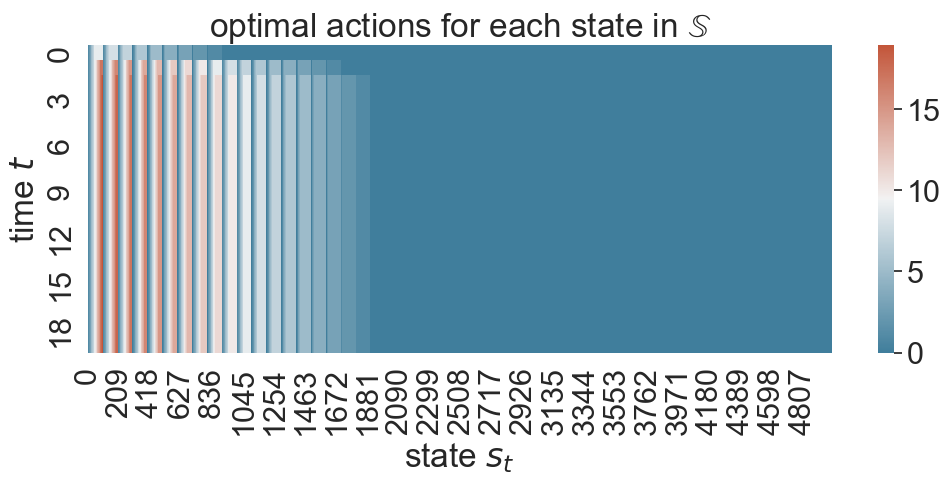

In [45]:
action_matrix = np.array([ optimal_actions_co[t] for t in optimal_actions_co ])
action_df = pd.DataFrame(action_matrix)

fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(action_df, cmap=cmap, ax=ax)
ax.set_xlabel(r'state $s_t$')
ax.set_ylabel(r'time $t$')
ax.set_title(f'optimal actions for each state in '+r'$\mathbb{S}$')

## Cumulative Rewards

In [1]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
sns.set(font_scale=2)


CNT = 50
# generate random samples
np.random.seed(0)
s_rn_history = np.zeros(shape=(CNT,T))
a_rn_history = np.zeros(shape=(CNT,T))
r_rn_history = np.zeros(shape=(CNT,T))

for cnt in range(CNT):
    xi_rn_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_rn_history[cnt, t]
        a_t = optimal_actions_RN[t][int(s_t)]
        r_rn_history[cnt, t] = r_t[int(s_t), a_t, xi_rn_history[t]]
        s_next = np.clip(s_t+a_t-xi_rn_history[t], a_min=0, a_max=max(S_space))

        if t+1 <= T-1:
            s_rn_history[cnt, t+1] = s_next
            
r_rn_history_cumsum = r_rn_history.cumsum(axis=1)
r_rn_history_mean = r_rn_history_cumsum.mean(axis=0)
r_rn_history_std = r_rn_history_cumsum.std(axis=0)

sns.pointplot(x=np.arange(T), y=r_rn_history_mean, ax=ax, color='b')
ax.fill_between(x=np.arange(T), y1=r_rn_history_mean-r_rn_history_std, y2=r_rn_history_mean+r_rn_history_std, 
                color='b', alpha=0.2, label='RN')


np.random.seed(0)
s_cvar_history = np.zeros(shape=(CNT,T))
a_cvar_history = np.zeros(shape=(CNT,T))
r_cvar_history = np.zeros(shape=(CNT,T))
for cnt in range(CNT):
    xi_cvar_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_cvar_history[cnt, t]
        a_t = optimal_actions_cvar[t][int(s_t)]
        r_cvar_history[cnt, t] = r_t[int(s_t), a_t, xi_cvar_history[t]]
        s_next = np.clip(s_t+a_t-xi_cvar_history[t], a_min=0, a_max=max(S_space))
        
        if t+1 <= T-1:
            s_cvar_history[cnt, t+1] = s_next
            
r_cvar_history_cumsum = r_cvar_history.cumsum(axis=1)
r_cvar_history_mean = r_cvar_history_cumsum.mean(axis=0)
r_cvar_history_std = r_cvar_history_cumsum.std(axis=0)

sns.pointplot(x=np.arange(T), y=r_cvar_history_mean, ax=ax, color='r')
ax.fill_between(x=np.arange(T), y1=r_cvar_history_mean-r_cvar_history_std, y2=r_cvar_history_mean+r_cvar_history_std, 
                color='r', alpha=0.2, label=f'CVaR@{VAR_alpha}')


np.random.seed(0)
s_scr_history = np.zeros(shape=(CNT,T))
a_scr_history = np.zeros(shape=(CNT,T))
w_scr_history = np.zeros(shape=(CNT,T))
z_scr_history = np.zeros(shape=(CNT,T))
r_scr_history = np.zeros(shape=(CNT,T))

for cnt in range(CNT):
    xi_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_scr_history[cnt, t]
        w_t = w_scr_history[cnt, t]
        az_t = optimal_actions_scr[t][int(s_t*len(W_space)+(w_t-w_bias))]
        z_t, a_t = az_t//len(A_space), az_t%len(A_space)
        a_scr_history[cnt, t] = a_t
        r_scr_history[cnt, t] = r_t[int(s_t), a_t, xi_history[t]]
        
        s_next = np.clip(s_t+a_t-xi_history[t], a_min=0, a_max=max(S_space))
        w_next = np.clip(w_t-z_t, a_min=min(W_space), a_max=max(W_space))
        
        if t+1 <= T-1:
            s_scr_history[cnt, t+1] = s_next
            w_scr_history[cnt, t+1] = w_next
            
r_scr_history_cumsum = r_scr_history.cumsum(axis=1)
r_scr_history_mean = r_scr_history_cumsum.mean(axis=0)
r_scr_history_std = r_scr_history_cumsum.std(axis=0)

sns.pointplot(x=np.arange(T), y=r_scr_history_mean, ax=ax, color='orange')
ax.fill_between(x=np.arange(T), y1=r_scr_history_mean-r_history_std, y2=r_scr_history_mean+r_scr_history_std, 
                color='orange', alpha=0.2, label=f'Standard capital requirement')


np.random.seed(0)
s_wr_history = np.zeros(shape=(CNT,T))
a_wr_history = np.zeros(shape=(CNT,T))
w_wr_history = np.zeros(shape=(CNT,T))
z_wr_history = np.zeros(shape=(CNT,T))
r_wr_history = np.zeros(shape=(CNT,T))

for cnt in range(CNT):
    xi_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_wr_history[cnt, t]
        w_t = w_wr_history[cnt, t]
        az_t = optimal_actions_wr[t][int(s_t*len(W_space)+(w_t-w_bias))]
        z_t, a_t = az_t//len(A_space), az_t%len(A_space)
        a_wr_history[cnt, t] = a_t
        r_wr_history[cnt, t] = r_t[int(s_t), a_t, xi_history[t]]
        
        s_next = np.clip(s_t+a_t-xi_history[t], a_min=0, a_max=max(S_space))
        w_next = np.clip(w_t+r_wr_history[cnt, t], a_min=min(W_space), a_max=max(W_space))
        
        if t+1 <= T-1:
            s_wr_history[cnt, t+1] = s_next
            w_wr_history[cnt, t+1] = w_next
            
r_wr_history_cumsum = r_wr_history.cumsum(axis=1)
r_wr_history_mean = r_wr_history_cumsum.mean(axis=0)
r_wr_history_std = r_wr_history_cumsum.std(axis=0)

sns.pointplot(x=np.arange(T), y=r_wr_history_mean, ax=ax, color='g')
ax.fill_between(x=np.arange(T), y1=r_wr_history_mean-r_wr_history_std, y2=r_wr_history_mean+r_wr_history_std, 
                color= 'g', alpha=0.2, label=f'Wealth reserve')




np.random.seed(0)
s_co_history = np.zeros(shape=(CNT,T))
a_co_history = np.zeros(shape=(CNT,T))
w_co_history = np.zeros(shape=(CNT,T))
z_co_history = np.zeros(shape=(CNT,T))
r_co_history = np.zeros(shape=(CNT,T))

for cnt in range(CNT):
    xi_history = np.random.choice(XI_space, T, p=prob)

    for t in range(T):
        s_t = s_co_history[cnt, t]
        w_t = w_co_history[cnt, t]
        a_t = optimal_actions_co[t][int(s_t*len(W_space)+(w_t-w_bias))]
        a_co_history[cnt, t] = a_t
        r_co_history[cnt, t] = r_t[int(s_t), a_t, xi_history[t]]
        
        s_next = np.clip(s_t+a_t-xi_history[t], a_min=0, a_max=max(S_space))
        w_next = np.clip(w_t+r_co_history[cnt, t], a_min=min(W_space), a_max=max(W_space))

        if t+1 <= T-1:
            s_co_history[cnt, t+1] = s_next
            w_co_history[cnt, t+1] = w_next
            
r_co_history_cumsum = r_co_history.cumsum(axis=1)
r_co_history_mean = r_co_history_cumsum.mean(axis=0)
r_co_history_std = r_co_history_cumsum.std(axis=0)

sns.pointplot(x=np.arange(T), y=r_co_history_mean, ax=ax, color='cyan')
ax.fill_between(x=np.arange(T), y1=r_co_history_mean-r_co_history_std, y2=r_co_history_mean+r_co_history_std, 
                color= 'cyan', alpha=0.2, label=f'Cash Order Only')


ax.set_title('empirical cumulative rewards')
ax.legend()
ax.set_xlabel(r'time $t$', fontsize=20)
ax.set_ylabel('cumulative rewards', fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

NameError: name 'sns' is not defined